In [109]:
import pandas as pd

In [110]:
df = pd.read_csv('heart.csv')

In [111]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [112]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [113]:
x = df.drop('target' , axis = 1).values

In [114]:
x[0:1]

array([[ 52.,   1.,   0., 125., 212.,   0.,   1., 168.,   0.,   1.,   2.,
          2.,   3.]])

In [115]:
y = df['target'].values

In [116]:
y[0:5]

array([0, 0, 0, 0, 0])

In [117]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2)

In [118]:
x_train

array([[62.,  1.,  2., ...,  1.,  3.,  3.],
       [46.,  1.,  2., ...,  1.,  0.,  2.],
       [46.,  1.,  0., ...,  2.,  0.,  3.],
       ...,
       [54.,  1.,  0., ...,  1.,  1.,  3.],
       [40.,  1.,  0., ...,  2.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.]])

In [119]:
x_train.shape

(820, 13)

In [120]:
x_test[0]

array([ 67. ,   1. ,   0. , 100. , 299. ,   0. ,   0. , 125. ,   1. ,
         0.9,   1. ,   2. ,   2. ])

In [121]:
x_test.shape

(205, 13)

In [122]:
y_train.shape

(820,)

In [123]:
y_test.shape

(205,)

In [124]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [125]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [126]:
y_pred = DT.predict(x_test)

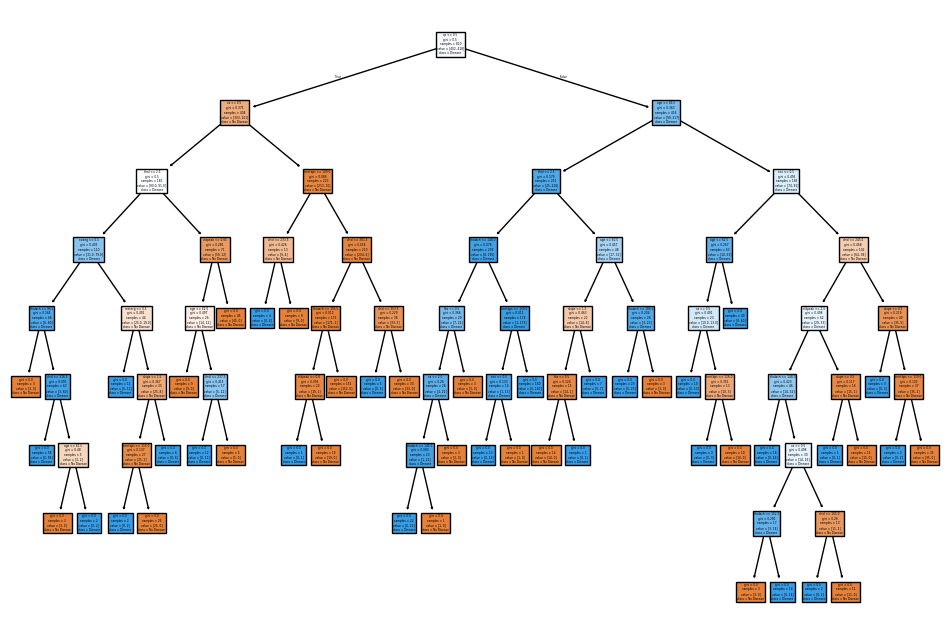

In [127]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plot_tree(DT,feature_names =df.drop('target', axis=1).columns ,class_names=['No Disease' , 'Disease'],filled=True)
plt.show()

In [128]:
DT_overfit= DecisionTreeClassifier(random_state=42)
DT_overfit.fit(x_train,y_train)


DecisionTreeClassifier(random_state=42)

In [129]:
y_pred = DT.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0])

In [130]:
from sklearn.metrics import accuracy_score
print('DecisionTree Accuracy:' , accuracy_score(y_test,y_pred) * 100)

DecisionTree Accuracy: 100.0


In [131]:
from sklearn.metrics import accuracy_score
print("DT_Overfit Accuracy:", accuracy_score(y_test , y_pred) * 100)

DT_Overfit Accuracy: 100.0


In [132]:
DT_pruned= DecisionTreeClassifier( max_depth = 4,random_state=42)
DT_pruned.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [133]:
y_pred = DT.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0])

In [134]:
print("DT_Pruned Accuracy:", accuracy_score(y_test,y_pred) * 100)

DT_Pruned Accuracy: 100.0


In [135]:
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0])

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
y_pred = DT.predict([[ 68. ,   1. ,   0. , 144. , 193. ,   1. ,   1. , 141. ,   0. ,
         3.4,   1. ,   2. ,   3. ]])
y_pred

array([0])

In [138]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

In [139]:
RF.fit(x_train , y_train)

RandomForestClassifier()

In [140]:
y_pred = RF.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0])

In [141]:

print("RandomForest Accuracy:", accuracy_score(y_test,y_pred) * 100)

RandomForest Accuracy: 100.0


In [142]:
y_pred = RF.predict([[ 68. ,   1. ,   0. , 144. , 193. ,   1. ,   1. , 141. ,   0. ,
         3.4,   1. ,   2. ,   3. ]])
y_pred

array([0])

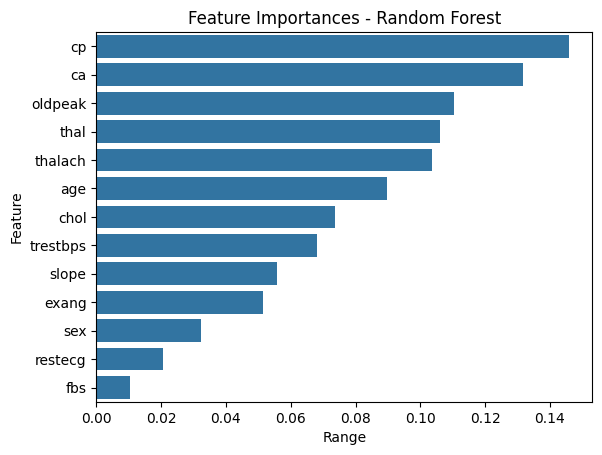

In [153]:
import pandas as pd
import seaborn as sns

feature_importances = pd.Series(RF.feature_importances_, index=df.drop('target', axis=1).columns )
feature_importances = feature_importances.sort_values(ascending=False)

sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances - Random Forest")
plt.ylabel('Feature')
plt.xlabel('Range')
plt.show()


In [143]:
from sklearn.model_selection import cross_val_score
import numpy as np
DT_scores = cross_val_score(DT,x,y,cv=5)
RF_scores = cross_val_score(DT,x,y,cv=5)
print('Decision Tree CV Accuracy:',np.mean(DT_scores))
print('Random ForestCV Accuracy:',np.mean(RF_scores))

Decision Tree CV Accuracy: 1.0
Random ForestCV Accuracy: 1.0
